# AST 4930 Week 3

## 1. feature scaling

### Let's load modules and the Iris dataset.

In [1]:
from sklearn.datasets import load_iris
from sklearn import neighbors
from sklearn.tree import export_graphviz, DecisionTreeClassifier, plot_tree

iris = load_iris()

### Let's make petal width in nm units.

In [2]:
X = iris.data[:, 2:] # use only petal length and width
X[:,1] *= 1.0e7 # cm to nm
y = iris.target

### Split into training/test datasets.

In [3]:
from sklearn.model_selection import train_test_split

#If you want to reproduce the result, make sure you use the same random_state value.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Let's visualize the data.

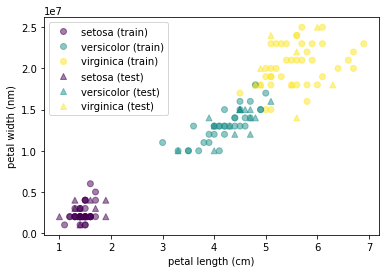

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 4))

norm = plt.Normalize(vmin=iris.target.min(), vmax=iris.target.max())

plot_train = ax.scatter(X_train[:,0], X_train[:,1], alpha=0.5, c=y_train, cmap='viridis', norm=norm)
plot_test = ax.scatter(X_test[:,0], X_test[:,1], alpha=0.5, c=y_test, cmap='viridis', norm=norm, marker='^')

ax.set_xlabel(iris.feature_names[2])
ax.set_ylabel('petal width (nm)')
ax.legend(plot_train.legend_elements()[0] + plot_test.legend_elements()[0],
          ['setosa (train)', 'versicolor (train)', 'virginica (train)'] 
          + ['setosa (test)', 'versicolor (test)', 'virginica (test)'])

### Train a kNN model.

In [5]:
model = neighbors.KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### Let's make an additional test data point.

In [6]:
test = [1.5,0.8e7]

### Let's check out where it locates.

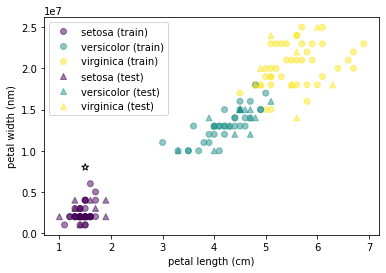

In [7]:
fig, ax = plt.subplots(figsize=(6, 4))

plot_train = ax.scatter(X_train[:,0], X_train[:,1], alpha=0.5, c=y_train, cmap='viridis', norm=norm)
plot_test = ax.scatter(X_test[:,0], X_test[:,1], alpha=0.5, c=y_test, cmap='viridis', norm=norm, marker='^')

#This is the additional test data point.
ax.scatter(test[0], test[1], alpha=1, 
           facecolors='none', edgecolors='black', cmap='viridis', norm=norm, marker='*', s=50)

ax.set_xlabel(iris.feature_names[2])
ax.set_ylabel('petal width (nm)')
ax.legend(plot_train.legend_elements()[0] + plot_test.legend_elements()[0],
          ['setosa (train)', 'versicolor (train)', 'virginica (train)'] 
          + ['setosa (test)', 'versicolor (test)', 'virginica (test)'])

### Let's visualize the model prediction and the five neighbors.

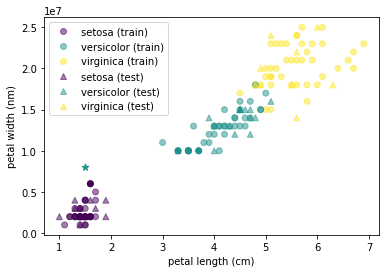

In [8]:
fig, ax = plt.subplots(figsize=(6, 4))

plot_train = ax.scatter(X_train[:,0], X_train[:,1], alpha=0.5, c=y_train, cmap='viridis', norm=norm)
plot_test = ax.scatter(X_test[:,0], X_test[:,1], alpha=0.5, c=y_test, cmap='viridis', norm=norm, marker='^')

#This is the additional test data point.
ax.scatter(test[0], test[1], alpha=1, 
           c=model.predict([test]), cmap='viridis', norm=norm, marker='*', s=50)

#Record the indices of the neighbors in "ind"
dist, ind = model.kneighbors([test], n_neighbors=5)
dist = dist.flatten()
ind = ind.flatten()

#These are the five neighbors of the additional test data point
ax.scatter(X_train[ind,0], X_train[ind,1], alpha=1, 
           c=y_train[ind], cmap='viridis', norm=norm)

ax.set_xlabel(iris.feature_names[2])
ax.set_ylabel('petal width (nm)')
ax.legend(plot_train.legend_elements()[0] + plot_test.legend_elements()[0],
          ['setosa (train)', 'versicolor (train)', 'virginica (train)'] 
          + ['setosa (test)', 'versicolor (test)', 'virginica (test)'])

### Something doesn't look correct... This is why we need to scale features for kNN.

### Load the module called "StandardScaler"

In [9]:
from sklearn.preprocessing import StandardScaler

### Compute the mean and variance using the "training dataset only", and then apply standardization to both training and test datasets. This is very important! Don't compute the mean/variance using the entire set.

In [10]:
#StandardScaler().fit(X_train) -> compute the mean and variance using "X_train", not "X".
#transform(X_train) -> apply standardization to "X_train"
#transform(X_test) -> apply standardization to "X_test"

X_train_scaled = StandardScaler().fit(X_train).transform(X_train)
X_test_scaled = StandardScaler().fit(X_train).transform(X_test)

#We also scale the additional test datapoint.
test_scaled = StandardScaler().fit(X_train).transform([test])

### Let's see if things have changed.

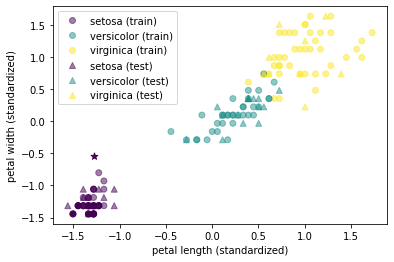

In [11]:
model_scaled = neighbors.KNeighborsClassifier(n_neighbors=5)
model_scaled.fit(X_train_scaled, y_train)

fig, ax = plt.subplots(figsize=(6, 4))


plot_train = ax.scatter(X_train_scaled[:,0], X_train_scaled[:,1], alpha=0.5, c=y_train, cmap='viridis', norm=norm)
plot_test = ax.scatter(X_test_scaled[:,0], X_test_scaled[:,1], alpha=0.5, c=y_test, cmap='viridis', norm=norm, marker='^')

#This is the additional test data point.
ax.scatter(test_scaled[0][0], test_scaled[0][1], alpha=1, 
           c=model.predict(test_scaled), cmap='viridis', norm=norm, marker='*', s=50)

#Record the indices of the neighbors in "ind"
dist, ind = model.kneighbors(test_scaled, n_neighbors=5)
dist = dist.flatten()
ind = ind.flatten()

#These are the five neighbors of the additional test data point
ax.scatter(X_train_scaled[ind,0], X_train_scaled[ind,1], alpha=1, 
           c=y_train[ind], cmap='viridis', norm=norm)


ax.set_xlabel('petal length (standardized)')
ax.set_ylabel('petal width (standardized)')
ax.legend(plot_train.legend_elements()[0] + plot_test.legend_elements()[0],
          ['setosa (train)', 'versicolor (train)', 'virginica (train)'] 
          + ['setosa (test)', 'versicolor (test)', 'virginica (test)'])

### It looks correct now.

### Does DT need feature scaling as well?

In [12]:
from sklearn import tree
from sklearn.tree import export_graphviz, DecisionTreeClassifier, plot_tree

model = DecisionTreeClassifier(max_depth=3, random_state=0)
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

### Let's try out DT without feature scaling (i.e., X_train, X_test).

Text(0, 0.5, 'petal width (cm)')

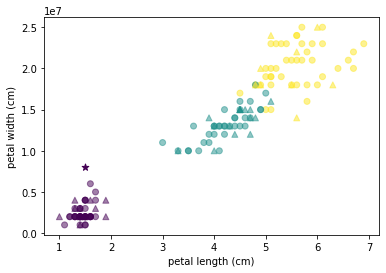

In [13]:
fig, ax = plt.subplots(figsize=(6, 4))

#ax.contourf(xpts, ypts, Z, alpha=0.5, cmap='viridis')

#Let's over-plot training/test data points.
plot_train = ax.scatter(X_train[:,0], X_train[:,1], alpha=0.5, c=y_train, cmap='viridis', 
                        norm=norm)
plot_test = ax.scatter(X_test[:,0], X_test[:,1], alpha=0.5, c=y_test, cmap='viridis', 
                       norm=norm, marker='^')

#This is the additional test data point.
ax.scatter(test[0], test[1], alpha=1, 
           c=model.predict([test]), cmap='viridis', norm=norm, marker='*', s=50)

ax.set_xlabel(iris.feature_names[2])
ax.set_ylabel(iris.feature_names[3])

### DT doesn't seem to have an issue. Now let's try out DT with feature scaling (i.e., X_train_scaled, X_test_scaled)

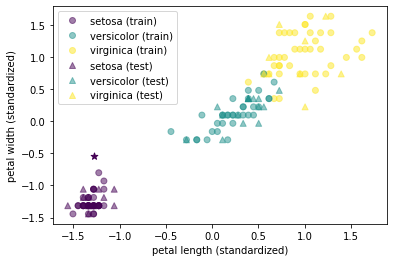

In [14]:
model_scaled = DecisionTreeClassifier(max_depth=3, random_state=0)
model_scaled.fit(X_train_scaled, y_train)

fig, ax = plt.subplots(figsize=(6, 4))


plot_train = ax.scatter(X_train_scaled[:,0], X_train_scaled[:,1], alpha=0.5, c=y_train, cmap='viridis', norm=norm)
plot_test = ax.scatter(X_test_scaled[:,0], X_test_scaled[:,1], alpha=0.5, c=y_test, cmap='viridis', norm=norm, marker='^')

#This is the additional test data point.
ax.scatter(test_scaled[0][0], test_scaled[0][1], alpha=1, 
           c=model.predict(test_scaled), cmap='viridis', norm=norm, marker='*', s=50)

ax.set_xlabel('petal length (standardized)')
ax.set_ylabel('petal width (standardized)')
ax.legend(plot_train.legend_elements()[0] + plot_test.legend_elements()[0],
          ['setosa (train)', 'versicolor (train)', 'virginica (train)'] 
          + ['setosa (test)', 'versicolor (test)', 'virginica (test)'])

## 2. Regression with kNN & DT

### Let's create data points around y=x.

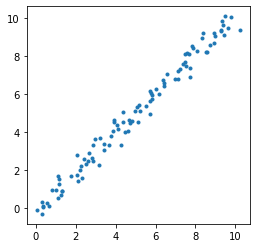

In [15]:
import numpy as np

X = np.linspace(0,10,100)

np.random.seed(0)
dx = np.random.random(100)-0.5

np.random.seed(1)
dy = np.random.random(100)-0.5

y = X + dy
X = X + dx

fig, ax = plt.subplots(figsize=(4, 4))

ax.plot(X,y,'.')

### Split the data.

In [16]:
X = np.expand_dims(X, axis=1)
y = np.expand_dims(y, axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Train the kNN model

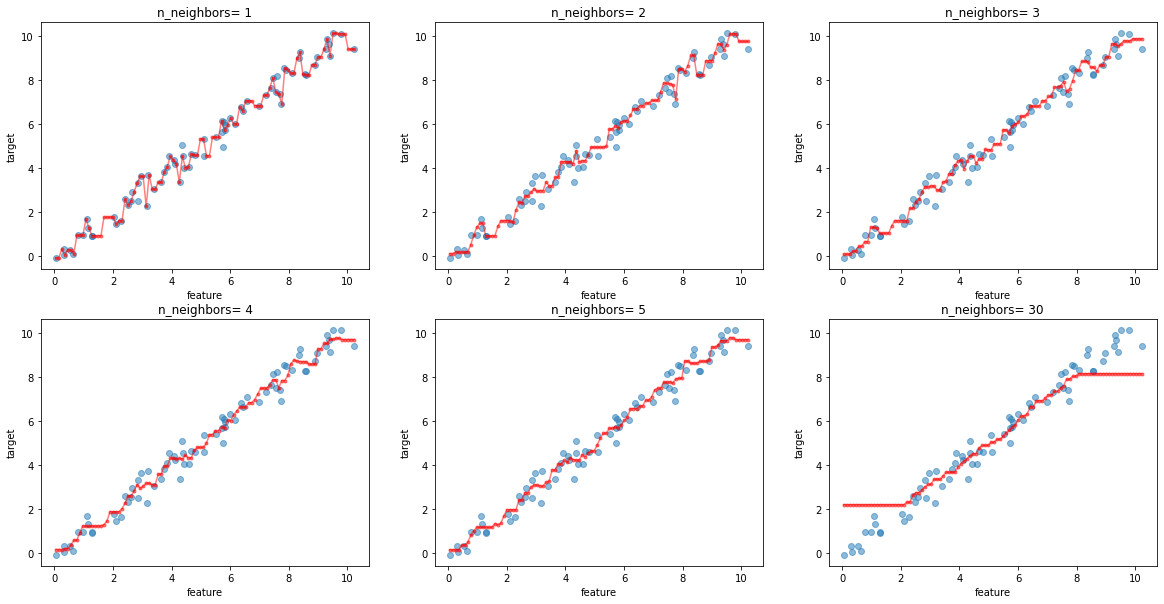

In [17]:
from sklearn.neighbors import KNeighborsRegressor

fig, axes = plt.subplots(2, 3, figsize=(20, 10))

training_accuracy = []
test_accuracy = []

n_neighbors = [1,2,3,4,5,30]

for i, ax in enumerate(axes.flat):
    model = KNeighborsRegressor(n_neighbors=n_neighbors[i])
    model.fit(X_train, y_train)
    training_accuracy.append(model.score(X_train, y_train))
    test_accuracy.append(model.score(X_test, y_test))
    ax.scatter(X_train, y_train, alpha=0.5)
    x = np.linspace(X.min(),X.max(),100)
    x = np.expand_dims(x, axis=1)
    y = model.predict(x)
    ax.plot(x, y, color='red', alpha=0.5, marker='.')
    ax.set_xlabel('feature')
    ax.set_ylabel('target')
    ax.set_title('n_neighbors= {}'.format(n_neighbors[i]))

### What is happening with k=30? Is there a way to fix it?

Text(0, 0.5, 'target')

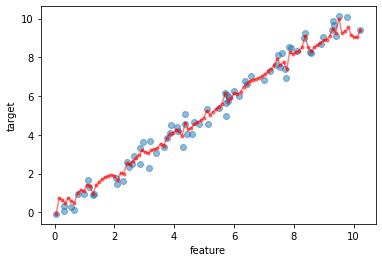

In [18]:
#Use weights='distance'
model = KNeighborsRegressor(n_neighbors=30, weights='distance')
model.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(6, 4))

ax.scatter(X_train, y_train, alpha=0.5)
x = np.linspace(X.min(),X.max(),100)
x = np.expand_dims(x, axis=1)
y = model.predict(x)
ax.plot(x, y, color='red', alpha=0.5, marker='.')
ax.set_xlabel('feature')
ax.set_ylabel('target')

### Now train DT.

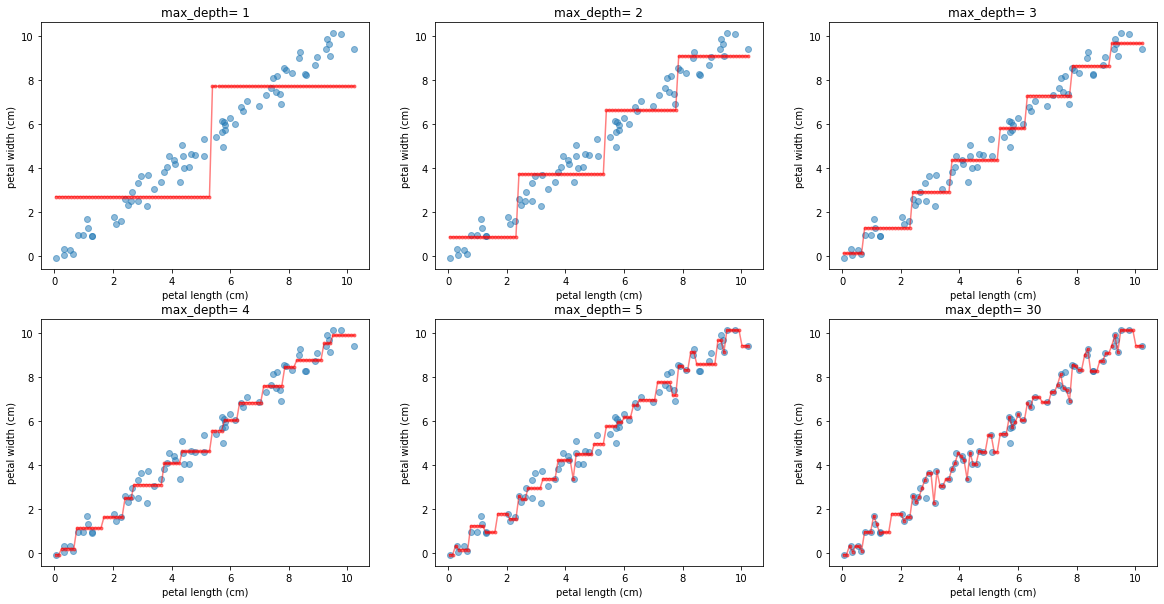

In [19]:
from sklearn.tree import DecisionTreeRegressor

fig, axes = plt.subplots(2, 3, figsize=(20, 10))

training_accuracy = []
test_accuracy = []

max_depth = [1,2,3,4,5,30]

for i, ax in enumerate(axes.flat):
    model = DecisionTreeRegressor(max_depth=max_depth[i], random_state=0)
    model.fit(X_train, y_train)
    training_accuracy.append(model.score(X_train, y_train))
    test_accuracy.append(model.score(X_test, y_test))
    ax.scatter(X_train, y_train, alpha=0.5)
    x = np.linspace(X.min(),X.max(),100)
    x = np.expand_dims(x, axis=1)
    y = model.predict(x)
    ax.plot(x, y, color='red', alpha=0.5, marker='.')
    ax.set_xlabel(iris.feature_names[2])
    ax.set_ylabel(iris.feature_names[3])
    ax.set_title('max_depth= {}'.format(max_depth[i]))

## 3. Astrophysical implications: SDSS

### Here, we will load a sample data using astroML: http://astroML.github.com

In [90]:
data = np.load('/blue/ast4930/share/SDSS_example.npz')['data']

### Let's see what the data look like.

In [91]:
data

array([(18.12765, 16.74071, 16.0601 , 15.64647, 15.33968, 'GALAXY', 0.05510195, 4.940349e-06),
       (19.55895, 19.22136, 19.10027, 19.05952, 18.88776, 'QSO', 2.03343   , 5.199062e-04),
       (18.8825 , 17.28107, 16.44476, 16.02969, 15.69595, 'GALAXY', 0.05059243, 1.165574e-05),
       ...,
       (19.30455, 17.73909, 16.89555, 16.49033, 16.20689, 'GALAXY', 0.1319363 , 1.246567e-05),
       (19.0794 , 17.64491, 16.75891, 16.31428, 16.02717, 'GALAXY', 0.143264  , 9.837011e-06),
       (19.07436, 17.35151, 16.50419, 16.08712, 15.72102, 'GALAXY', 0.05488494, 1.983599e-05)],
      dtype=[('u', '<f8'), ('g', '<f8'), ('r', '<f8'), ('i', '<f8'), ('z', '<f8'), ('specClass', '<U6'), ('redshift', '<f8'), ('redshift_err', '<f8')])

In [86]:
data.shape, len(data[0])

((50000,), 8)

### It's a data set with 50,000 objects. For each object, there are u, g, r, i, z magitudes, class, redshift, redshift error.

In [87]:
data['specClass']

array(['GALAXY', 'QSO', 'GALAXY', ..., 'GALAXY', 'GALAXY', 'GALAXY'],
      dtype='<U6')

### Let's make colors (u-g, g-r, r-i, i-z).

In [24]:
# Extract colors and spectral class
ug = data['u'] - data['g']
gr = data['g'] - data['r']
ri = data['r'] - data['i']
iz = data['i'] - data['z']
spec_class = data['specClass']

# Separating galaxies and quasars
galaxies = (spec_class == 'GALAXY')
qsos = (spec_class == 'QSO')

### Let's make color-color diagrams.

Text(0, 0.5, '$i-z$')

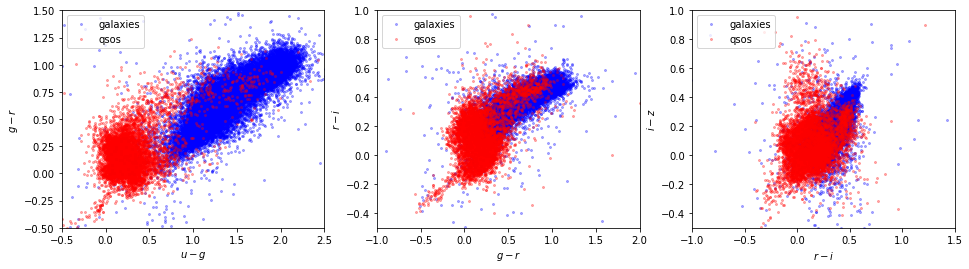

In [25]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(16, 4))

ax1.set_xlim(-0.5, 2.5)
ax1.set_ylim(-0.5, 1.5)

ax1.plot(ug[galaxies], gr[galaxies], '.', ms=4, c='b', label='galaxies', alpha=0.3)
ax1.plot(ug[qsos], gr[qsos], '.', ms=4, c='r', label='qsos', alpha=0.3)

ax1.legend(loc=2)

ax1.set_xlabel('$u-g$')
ax1.set_ylabel('$g-r$')

ax2.set_xlim(-1, 2.)
ax2.set_ylim(-0.5, 1.)

ax2.plot(gr[galaxies], ri[galaxies], '.', ms=4, c='b', label='galaxies', alpha=0.3)
ax2.plot(gr[qsos], ri[qsos], '.', ms=4, c='r', label='qsos', alpha=0.3)

ax2.legend(loc=2)

ax2.set_xlabel('$g-r$')
ax2.set_ylabel('$r-i$')

ax3.set_xlim(-1, 1.5)
ax3.set_ylim(-0.5, 1.)

ax3.plot(ri[galaxies], iz[galaxies], '.', ms=4, c='b', label='galaxies', alpha=0.3)
ax3.plot(ri[qsos], iz[qsos], '.', ms=4, c='r', label='qsos', alpha=0.3)

ax3.legend(loc=2)

ax3.set_xlabel('$r-i$')
ax3.set_ylabel('$i-z$')

### It looks like we can classify galaxies and quasars using colors. Let's use kNN and DT to do this!

### Let's first make arrays to be compatible with sklearn knn & DT.

In [26]:
# X for an array containing features (i.e., colors)
X = np.array([ug, gr, ri, iz]).T

# y for an array containing labels (i.e., galaxies or quasars)
y = np.expand_dims(spec_class, axis=1)

### Do we need feature scaling? It looks like colors have similar scales so we are probably fine without scaling.

### Let's split into training/test datasets.

In [27]:
from sklearn.model_selection import train_test_split

#If you want to reproduce the result, make sure you use the same random_state value.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((37500, 4), (12500, 4), (37500, 1), (12500, 1))

### Train a kNN model while varying n_neighbors from 1 to 50

In [28]:
training_accuracy = []
test_accuracy = []

n_neighbors = np.arange(1,51)

for i in n_neighbors:
    print(i) # I am going to print out i to keep track of things.
    model = neighbors.KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    training_accuracy.append(model.score(X_train, y_train))
    test_accuracy.append(model.score(X_test, y_test))


1


/Users/jbae/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


2


/Users/jbae/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


3


/Users/jbae/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


4


/Users/jbae/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


5


/Users/jbae/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


6


/Users/jbae/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


7


/Users/jbae/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


8


/Users/jbae/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


9


/Users/jbae/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


10


/Users/jbae/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


11


/Users/jbae/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


12


/Users/jbae/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


13


/Users/jbae/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


14


/Users/jbae/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


15


/Users/jbae/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


16


/Users/jbae/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


17


/Users/jbae/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


18


/Users/jbae/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


19


/Users/jbae/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


20


/Users/jbae/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


21


/Users/jbae/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


22


/Users/jbae/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


23


/Users/jbae/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


24


/Users/jbae/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


25


/Users/jbae/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


26


/Users/jbae/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


27


/Users/jbae/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


28


/Users/jbae/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


29


/Users/jbae/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


30


/Users/jbae/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


31


/Users/jbae/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


32


/Users/jbae/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


33


/Users/jbae/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


34


/Users/jbae/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


35


/Users/jbae/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


36


/Users/jbae/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


37


/Users/jbae/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


38


/Users/jbae/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


39


/Users/jbae/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


40


/Users/jbae/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


41


/Users/jbae/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


42


/Users/jbae/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


43


/Users/jbae/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


44


/Users/jbae/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


45


/Users/jbae/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


46


/Users/jbae/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


47


/Users/jbae/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


48


/Users/jbae/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


49


/Users/jbae/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


50


/Users/jbae/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


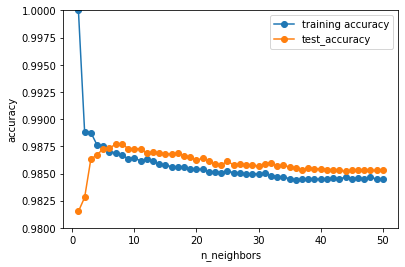

In [29]:
fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(n_neighbors, training_accuracy, 'o-')
ax.plot(n_neighbors, test_accuracy, 'o-')

ax.set_xlabel('n_neighbors')
ax.set_ylabel('accuracy')
ax.set_ylim(0.98,1)
ax.legend(['training accuracy','test_accuracy'])

In [30]:
best_n_neighbors = np.argmax(test_accuracy)
print(best_n_neighbors)

model = neighbors.KNeighborsClassifier(n_neighbors=best_n_neighbors)
model.fit(X_train, y_train)


7


/Users/jbae/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

### Let's check out for which data points the prediction went wrong.

Text(0, 0.5, '$i-z$')

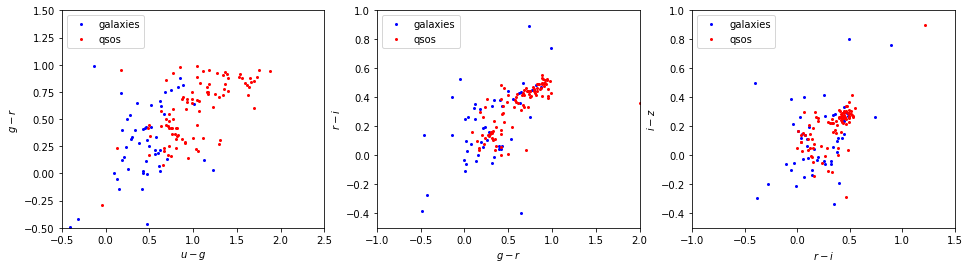

In [31]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(16, 4))

ax1.set_xlim(-0.5, 2.5)
ax1.set_ylim(-0.5, 1.5)

#These are indices for wrong prediction.
ind_wrong_galaxy = (model.predict(X_test) != y_test.flatten()) & (y_test.flatten() == 'GALAXY')
ind_wrong_qso = (model.predict(X_test) != y_test.flatten()) & (y_test.flatten() == 'QSO')

ax1.plot(X_test[:,0][ind_wrong_galaxy], X_test[:,1][ind_wrong_galaxy], 
         '.', ms=4, c='b', label='galaxies', alpha=1)
ax1.plot(X_test[:,0][ind_wrong_qso], X_test[:,1][ind_wrong_qso], 
         '.', ms=4, c='r', label='qsos', alpha=1)

ax1.legend(loc=2)

ax1.set_xlabel('$u-g$')
ax1.set_ylabel('$g-r$')

ax2.set_xlim(-1, 2.)
ax2.set_ylim(-0.5, 1.)

ax2.plot(X_test[:,1][ind_wrong_galaxy], X_test[:,2][ind_wrong_galaxy], 
         '.', ms=4, c='b', label='galaxies', alpha=1)
ax2.plot(X_test[:,1][ind_wrong_qso], X_test[:,2][ind_wrong_qso], 
         '.', ms=4, c='r', label='qsos', alpha=1)

ax2.legend(loc=2)

ax2.set_xlabel('$g-r$')
ax2.set_ylabel('$r-i$')

ax3.set_xlim(-1, 1.5)
ax3.set_ylim(-0.5, 1.)

ax3.plot(X_test[:,2][ind_wrong_galaxy], X_test[:,3][ind_wrong_galaxy], 
         '.', ms=4, c='b', label='galaxies', alpha=1)
ax3.plot(X_test[:,2][ind_wrong_qso], X_test[:,3][ind_wrong_qso], 
         '.', ms=4, c='r', label='qsos', alpha=1)

ax3.legend(loc=2)

ax3.set_xlabel('$r-i$')
ax3.set_ylabel('$i-z$')

### Does this look reasonable to you?

### Let's move on to DT now.

In [32]:
from sklearn.tree import DecisionTreeClassifier, plot_tree


training_accuracy = []
test_accuracy = []

n_neighbors = np.arange(1,51)

for i in n_neighbors:
    print(i) # I am going to print out i to keep track of things.
    model = DecisionTreeClassifier(max_depth=i, random_state=0)
    model.fit(X_train, y_train)
    training_accuracy.append(model.score(X_train, y_train))
    test_accuracy.append(model.score(X_test, y_test))


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


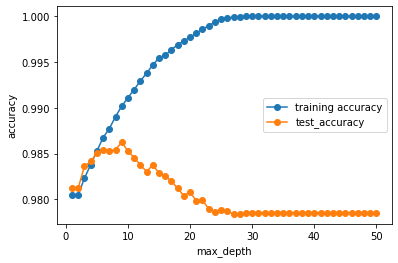

In [33]:
fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(n_neighbors, training_accuracy, 'o-')
ax.plot(n_neighbors, test_accuracy, 'o-')

ax.set_xlabel('max_depth')
ax.set_ylabel('accuracy')
ax.legend(['training accuracy','test_accuracy'])


In [34]:
best_max_depth = np.argmax(test_accuracy)
print(best_max_depth)

model = DecisionTreeClassifier(max_depth=best_max_depth, random_state=0)
model.fit(X_train, y_train)

8


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

### Let's check out for which data points the prediction went wrong.

Text(0, 0.5, '$i-z$')

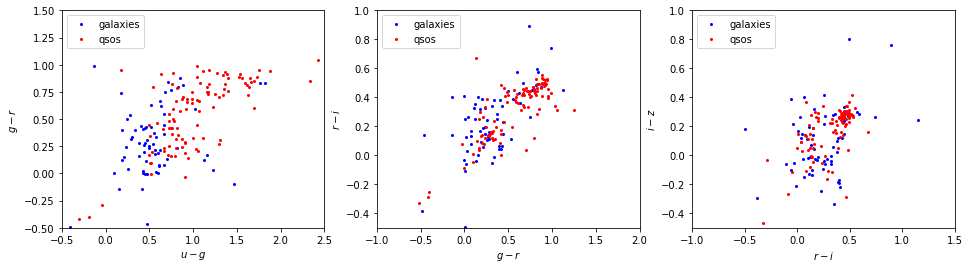

In [35]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(16, 4))

ax1.set_xlim(-0.5, 2.5)
ax1.set_ylim(-0.5, 1.5)

#These are indices for wrong prediction.
ind_wrong_galaxy = (model.predict(X_test) != y_test.flatten()) & (y_test.flatten() == 'GALAXY')
ind_wrong_qso = (model.predict(X_test) != y_test.flatten()) & (y_test.flatten() == 'QSO')

ax1.plot(X_test[:,0][ind_wrong_galaxy], X_test[:,1][ind_wrong_galaxy], 
         '.', ms=4, c='b', label='galaxies', alpha=1)
ax1.plot(X_test[:,0][ind_wrong_qso], X_test[:,1][ind_wrong_qso], 
         '.', ms=4, c='r', label='qsos', alpha=1)

ax1.legend(loc=2)

ax1.set_xlabel('$u-g$')
ax1.set_ylabel('$g-r$')

ax2.set_xlim(-1, 2.)
ax2.set_ylim(-0.5, 1.)

ax2.plot(X_test[:,1][ind_wrong_galaxy], X_test[:,2][ind_wrong_galaxy], 
         '.', ms=4, c='b', label='galaxies', alpha=1)
ax2.plot(X_test[:,1][ind_wrong_qso], X_test[:,2][ind_wrong_qso], 
         '.', ms=4, c='r', label='qsos', alpha=1)

ax2.legend(loc=2)

ax2.set_xlabel('$g-r$')
ax2.set_ylabel('$r-i$')

ax3.set_xlim(-1, 1.5)
ax3.set_ylim(-0.5, 1.)

ax3.plot(X_test[:,2][ind_wrong_galaxy], X_test[:,3][ind_wrong_galaxy], 
         '.', ms=4, c='b', label='galaxies', alpha=1)
ax3.plot(X_test[:,2][ind_wrong_qso], X_test[:,3][ind_wrong_qso], 
         '.', ms=4, c='r', label='qsos', alpha=1)

ax3.legend(loc=2)

ax3.set_xlabel('$r-i$')
ax3.set_ylabel('$i-z$')

### Does this look reasonable to you?

### Let's check which color was the most important feature in the DT model.

In [36]:
print('u-g', 'g-r', 'r-i', 'i-z')
print(model.feature_importances_)

u-g g-r r-i i-z
[0.94805325 0.01533251 0.01013393 0.02648031]


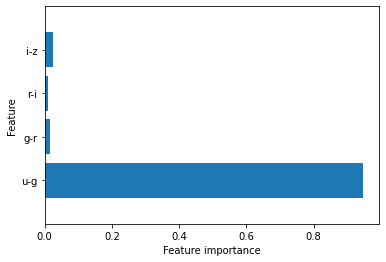

In [37]:
def plot_feature_importances(model):
    n_features = X.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), ['u-g','g-r','r-i','i-z'])
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    
plot_feature_importances(model)